In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
## my functions/classes
from mb_xai import mb_utils
import mb_xai.gut_data as gd
import mb_xai.gut_interpret as gi
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import Lasso
import networkx as nx

DATA_LOC = '../../../Data/microbiome_xai/'
FLUX_DF_NAME_all_FILT = "micom_fluxes-top50-9285_samples_fd_VEGAN-2000.csv"

gut_data = gd.GutData() # required to load for renaming metabolites as their id 
gut_data.load_data( 
    FILE_COMM_MODEL= DATA_LOC + 'reconstructions/community_top50_fd.pickle',
    FILE_GENUS_ASVS = DATA_LOC + 'agp_data/SILVA_genus_counts_fd.csv',
    FILE_METADATA = DATA_LOC + "agp_data/metadata_biosample_filtered.csv",
    DIR_SIM_DATA = DATA_LOC + "micom-sim-data/",
    FILE_FLUX_DF = "micom_medium-fluxes-top50-9285_samples_fd.csv"
)

Fixed EX_tDHNACOA(e)


,roc_auc,balanced_accuracy,average_precision,f1,f1_weighted
ibd_abundance,0.75±0.03,0.69±0.02,0.28±0.04,0.2±0.01,0.84±0.01
ibd_flux,0.67±0.03,0.64±0.02,0.14±0.03,0.15±0.01,0.81±0.01
ibs_abundance,0.58±0.02,0.56±0.02,0.19±0.01,0.27±0.01,0.62±0.01
ibs_flux,0.54±0.02,0.53±0.02,0.16±0.01,0.25±0.01,0.53±0.03
t2d_abundance,0.66±0.05,0.61±0.04,0.05±0.01,0.06±0.01,0.78±0.02
t2d_flux,0.56±0.04,0.53±0.03,0.03±0.01,0.04±0.01,0.7±0.03
vegan_abundance,0.73±0.04,0.68±0.04,0.08±0.02,0.1±0.01,0.84±0.01
vegan_flux,0.59±0.04,0.56±0.04,0.04±0.01,0.06±0.01,0.73±0.03


len(metab_overlap): 166
Non-zero feats (98,)
Non-zero feats (76,)
Non-zero feats (129,)
Non-zero feats (46,)


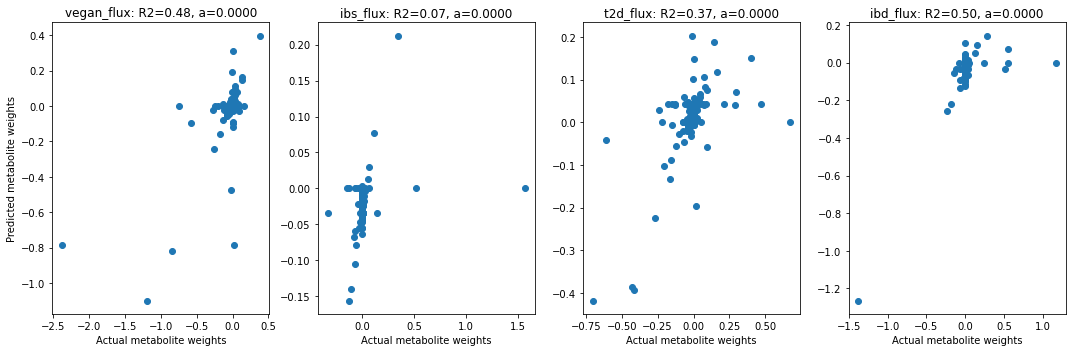

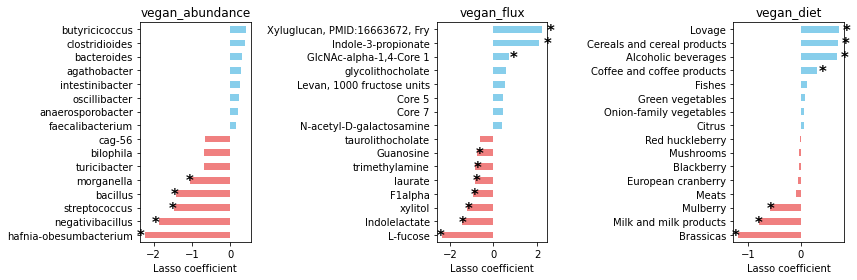

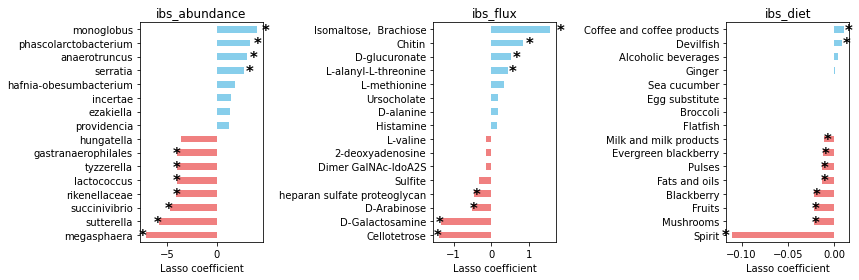

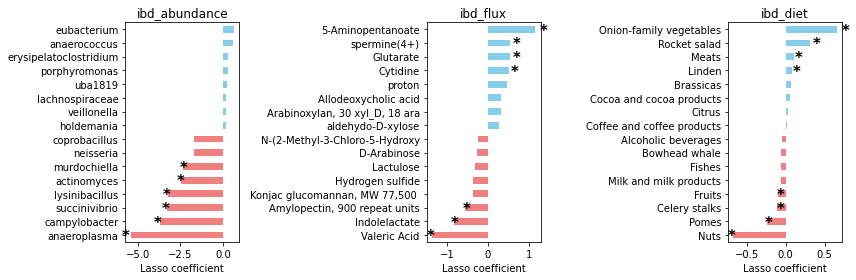

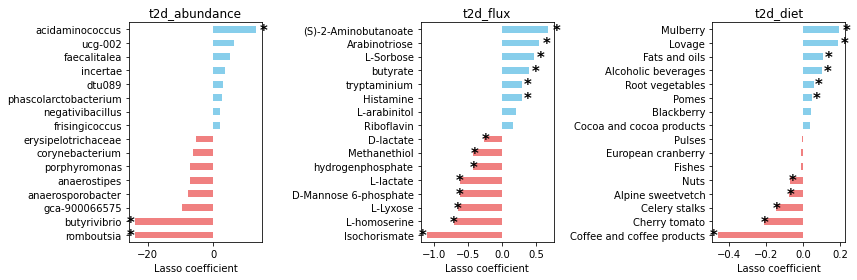

In [5]:
LASSO_ALPHA = 4.5#.5 #10e-(lasso_alpha) # 4 works well for PARALLEL_std-4_noparams_5_75

gut_interpret = gi.InterpretPred()
gut_interpret.load_pred(gut_data, 
    DIR_SIM_DATA=gut_data.dir_sim_data, 
    DATA_LOC=DATA_LOC,
    SAVE_ID ="PARALLEL",
    # SAVE_ID="PARALLEL_std-4_noparams_5_75",
    SAVE_FIG=True, 
    BOOL_FLUX_NOTMEDIUM=False)

gut_interpret.plot_performance_table(NO_DUMMY=True)
# gut_interpret.performance_table
display(gut_interpret.performance_table)

cols_foods = gut_interpret.food_matrix_df.columns[gut_interpret.food_matrix_df.sum()>3]
gut_interpret.food_matrix_df = gut_interpret.food_matrix_df[cols_foods]

gut_interpret.infer_foods(
    bool_concentrations=True, 
    bool_direct_flux=True, 
    bool_consumption=False, 
    normalize=True, 
    SAVE_ID_ALPHA=LASSO_ALPHA,
    PVAL_FILT=0.05)

for pheno in ["vegan", "ibs", "ibd", "t2d"]:
    ax = gut_interpret.plot_pheno_topfeats(pheno=pheno, n_feats=8, METAB_NAME=True, BOOL_DIRECT=True, PVAL_THRESH=0.05)

# NetworkX plot

1. Map significant abundances to significant metabolites.
2. Map significant metabolites to significant foods.

In [3]:
### Load large flux dataframe 
X_flux_notmedium = pd.read_csv(gut_data.dir_sim_data+FLUX_DF_NAME_all_FILT,index_col=0,low_memory=False)
X_flux_notmedium.index = X_flux_notmedium.index.astype(str)

0 ['ruminococcus', 'clostridium', 'alistipes', 'streptococcus']
1 ['Guanosine', 'Xyluglucan, PMID:16663672, Fry', 'Indole-3-propionate', 'spermine(4+)', 'laurate', 'L-fucose', 'trimethylamine', 'xylitol', 'Indolelactate']
2 ['Brassicas', 'Milk and milk products', 'Lovage', 'Cereals and cereal products', 'Mulberry']


/home/eskavvas/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 8 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/eskavvas/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0 ['bifidobacterium', 'bacteroides', 'prevotella', 'pseudomonas', 'bilophila', 'acinetobacter', 'lactobacillus', 'providencia']
1 ['Sulfite', 'heparan sulfate proteoglycan', 'L-alanyl-L-threonine', 'Isomaltose,  Brachiose', 'D-Arabinose', 'D-glucuronate', 'L-methionine', 'D-Galactosamine', 'Cellotetrose', 'Chitin']
2 ['Fruits', 'Pulses', 'Devilfish']


/home/eskavvas/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0 1 3 5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/eskavvas/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0 ['clostridium', 'eubacterium', 'alistipes', 'romboutsia', 'lachnospiraceae', 'pseudomonas']
1 ['Cytidine', 'spermine(4+)', '5-Aminopentanoate', 'Glutarate', 'Valeric Acid', 'Indolelactate']
2 ['Nuts', 'Onion-family vegetables', 'Rocket salad', 'Pomes', 'Celery stalks', 'Meats', 'Fruits', 'Linden']


/home/eskavvas/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [20 27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/eskavvas/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/eskavvas/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0  4 11 13 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/eskavvas/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/eskavvas/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are c

0 ['barnesiella', 'clostridium', 'anaerostipes', 'enterococcus', 'lachnospira', 'ruminococcus', 'subdoligranulum', 'coprococcus', 'intestinibacter', 'blautia']
1 ['hydrogenphosphate', 'Methanethiol', 'Histamine', 'tryptaminium', 'butyrate', 'L-homoserine', '(S)-2-Aminobutanoate', 'L-Sorbose', 'Isochorismate', 'D-lactate', 'L-lactate', 'L-Lyxose']
2 ['Coffee and coffee products', 'Cherry tomato', 'Mulberry', 'Lovage', 'Celery stalks', 'Fats and oils', 'Alpine sweetvetch', 'Nuts', 'Root vegetables', 'Pomes']


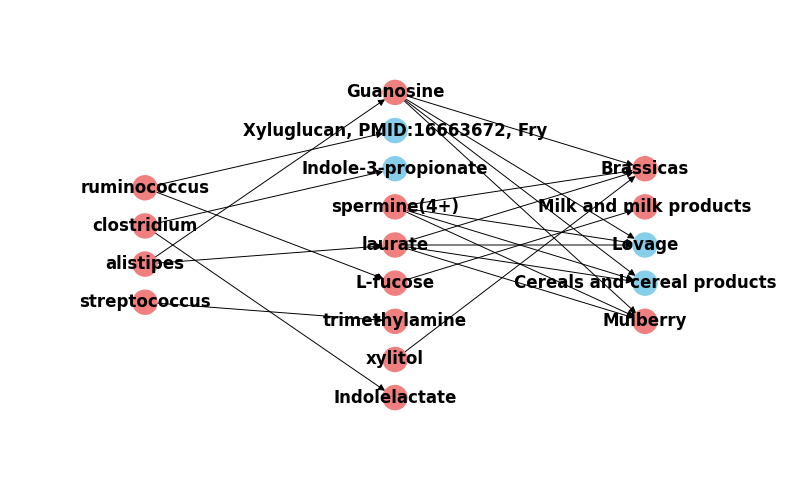

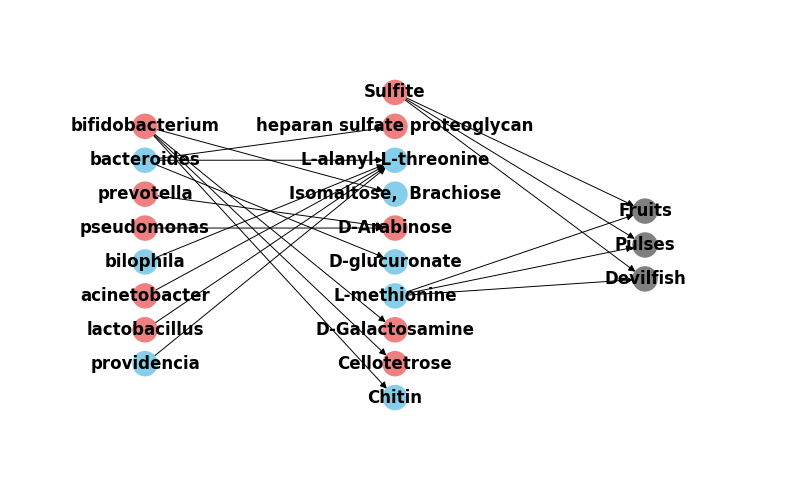

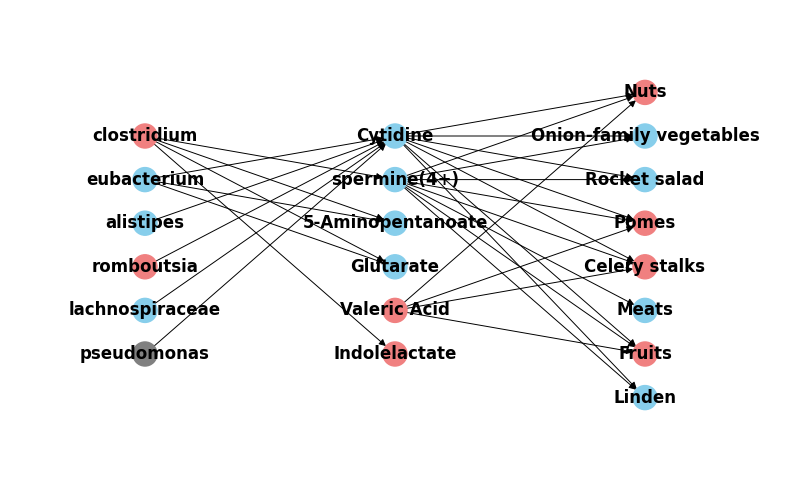

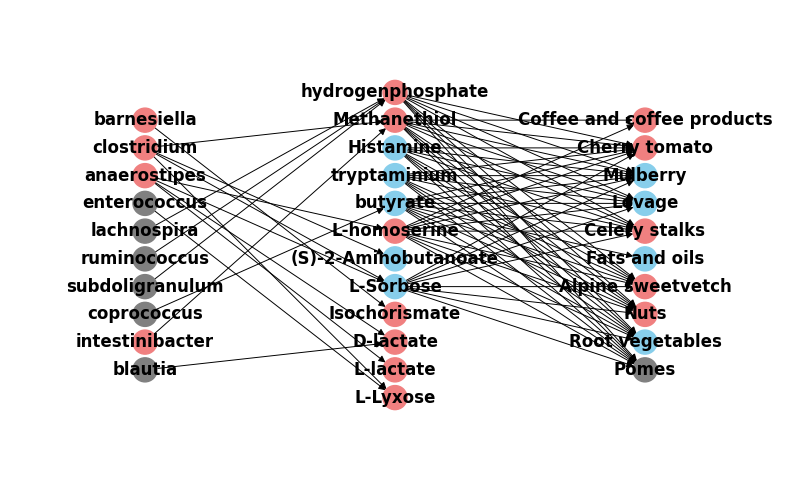

In [14]:
SIG_CUTOFF_REACTS = 0.05
SIG_CUTOFF_GENERA = 0.05
SIG_CUTOFF_METABS = 0.05
SIG_CUTOFF_FOODS = 0.05
BOOL_DIRECT_FLUX = True

for pheno in ["vegan", "ibs", "ibd", "t2d"][:]:
    df_pheno_name, L_genera_metabs = gi.get_genera_metab_nx_df(
        gut_data, gut_interpret, X_flux_notmedium, PHENO=pheno, SIG_CUTOFF_REACTS=SIG_CUTOFF_REACTS, 
        SIG_CUTOFF_GENERA=SIG_CUTOFF_GENERA, BOOL_DIRECT_FLUX=BOOL_DIRECT_FLUX, SCALE_=False)

    df_sig_foods_name, L_metabs_foods = gi.get_metab_food_nx_df(
        gut_data, gut_interpret, pheno=pheno,
        SIG_CUTOFF_METABS=SIG_CUTOFF_METABS, SIG_CUTOFF_FOODS=SIG_CUTOFF_FOODS)

    L_genera_metabs = [list(x) for x in L_genera_metabs]
    L_metabs_foods = [list(x) for x in L_metabs_foods]
    # L_genera_metabs_foods = L_genera_metabs.extend(L_metabs_foods)
    L_genera_metabs_foods = L_genera_metabs+L_metabs_foods
    
    f, ax = plt.subplots(1,1,figsize=(8,5), dpi=100)
    ax.margins(0.2)
    f, ax, G = gut_interpret.plot_genera_metab_food_networkx(
        df_pheno_name, df_sig_foods_name, L_genera_metabs_foods, cutoff_val=0.05, pheno=pheno,
        width=0.7,alpha=1,font_weight='bold',
        BOOL_DIRECT_FLUX=True,f=f,ax=ax)
    
    
    f.savefig(gut_interpret.dir_sim_data+"figures/"+"networkx_multipartite_%s_%s.png"%(pheno, gut_interpret.SAVE_ID))
    f.savefig(gut_interpret.dir_sim_data+"figures/"+"networkx_multipartite_%s_%s.svg"%(pheno, gut_interpret.SAVE_ID))

In [12]:
df_sig_foods_name

,L-methionine,Sulfite
Fruits,-1.0,-1.0
Pulses,-1.0,-1.0
Devilfish,-1.0,-1.0


In [15]:
input_type = pheno+"_flux"

sig_foods = mb_utils.get_pvalues(gut_interpret.food_signal_df[input_type].sort_values(), sig_cutoff=SIG_CUTOFF_FOODS)
sig_foods = gut_interpret.food_signal_df[input_type].sort_values().loc[sig_foods.index]

sig_food_metabs = mb_utils.get_pvalues(gut_interpret.y_df[input_type].sort_values(), sig_cutoff=SIG_CUTOFF_METABS)
sig_food_metabs = gut_interpret.y_df[input_type].sort_values().loc[sig_food_metabs.index]
sig_food_metabs.name = input_type

In [16]:
for sig_food in sig_foods.index:
    print(sig_food)

Squirrel, ground, meat (Alaska
European cranberry
Nuts
Alaska wild rhubarb
Milk and milk products
Walrus
Pulses
Alpine sweetvetch
Pomes
Meats
Garden onion (var.)
Cereals and cereal products
Orange mint
Mushrooms
Evergreen blackberry
Fats and oils
Cocoa and cocoa products
Fishes
Root vegetables


In [22]:
gut_interpret.food_signal_df.loc["Squirrel, ground, meat (Alaska"]

vegan_flux    0.002466
ibs_flux     -0.002302
t2d_flux      0.006613
ibd_flux      0.123734
Name: Squirrel, ground, meat (Alaska, dtype: float64

In [23]:
gut_interpret.A_df["Squirrel, ground, meat (Alaska"]

KeyError: 'Squirrel, ground, meat (Alaska'